# Taller de IA - Redes Neuronales Artificiales (RNA)
***Soluci√≥n a problemas de clasificaci√≥n***


Variables sencillas para concentrarnos en las RNA ‚úÖ

Ejemplo basado en *la historia de la vida* üòä


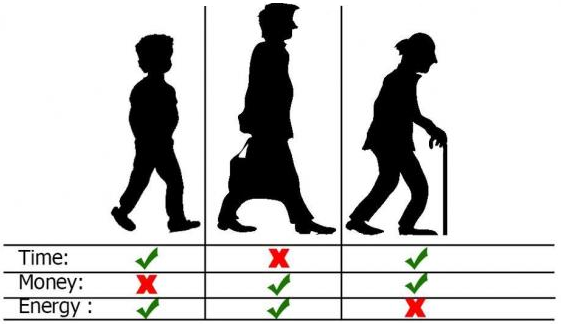

¬øEjemplos de problemas de ingenier√≠a en d√≥nde aplicar clasificaci√≥n?

## Preprocesamiento de datos

Importaci√≥n de m√≥dulos y librer√≠as √∫tiles

In [2]:
# Importaci√≥n, visualizaci√≥n, manipulaci√≥n de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformaci√≥n de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

# RNA
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Visualizaci√≥n de resultados
from sklearn.metrics import confusion_matrix

In [69]:
# Archivos pueden arrastrarse al √°rea de trabajo o procesarse en local

# Version Online
!wget https://github.com/AxelSkrauba/Taller_IA/raw/main/1_RNA_Classification/data_classification.zip

--2022-08-24 01:01:11--  https://github.com/AxelSkrauba/Taller_IA/blob/main/1_RNA_Classification/data_classification.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‚Äòdata_classification.zip‚Äô

data_classification     [ <=>                ] 132.59K  --.-KB/s    in 0.05s   

2022-08-24 01:01:12 (2.52 MB/s) - ‚Äòdata_classification.zip‚Äô saved [135769]



In [70]:
!unzip data_classification.zip

Archive:  data_classification.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data_classification.zip or
        data_classification.zip.zip, and cannot find data_classification.zip.ZIP, period.


In [4]:
# Lectura del dataset
dataset = pd.read_csv("data.csv")

In [5]:
# Para visualizar un fragmento de los datos
dataset.head(5)

tiempo  dinero  energia    clase
0    0.94    0.44     0.17  Anciano
1    0.81    0.02     0.84    Joven
2    0.89    0.06     0.94    Joven
3    0.84    0.09     0.31   Adulto
4    0.95    0.76     0.19  Anciano

In [6]:
# Para visualizar tipos de datos, cantidades, etc.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tiempo   200 non-null    float64
 1   dinero   200 non-null    float64
 2   energia  200 non-null    float64
 3   clase    200 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [7]:
# Categor√≠as disponibles en las variables categ√≥ricas
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        print(col,"->", dataset[col].unique())

clase -> ['Anciano' 'Joven' 'Adulto']


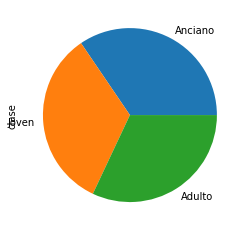

In [8]:
# Ejemplo de gr√°fica para una idea de las distribuciones
# En este caso... todo est√° medianamente equilibrado
# En la vida real es diferente
dataset['clase'].value_counts().plot.pie()

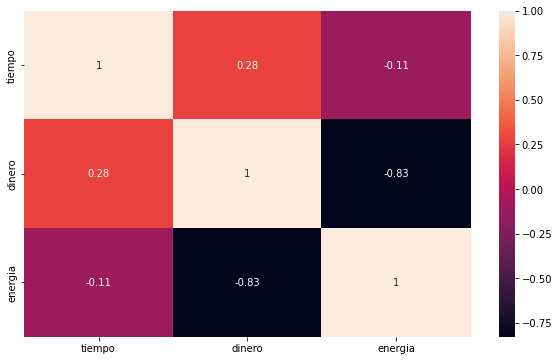

In [9]:
# Mapa de correlaciones, se puede observar dependencias entre columnas. Permite descartar descriptores que no aportan informaci√≥n nueva por ejemplo (resta costo computacional, etc.)
# Antes de plantear cualquier modelo, existe un gran trabajo de procesamiento y an√°lisis de los datos. Herramientas Estad√≠sticas juegan un roll fundamental.
sns.heatmap(data=dataset.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# En este caso, por ejemplo, no se observan fuertes relaciones entre las variables. Por lo tanto, en principio existe informaci√≥n √∫til en todas.
# NOTA: variables aletorias tampoco estar√°n correlacionadas, pero en este punto, asumimos que anteriormente validamos que estas variables "tienen que ver" con nuestro problema.

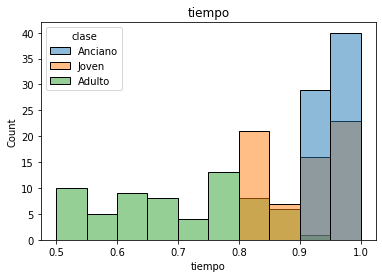

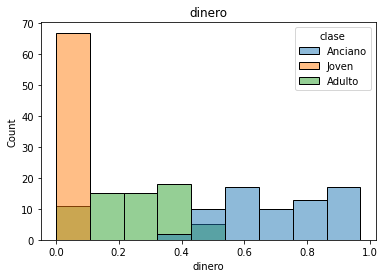

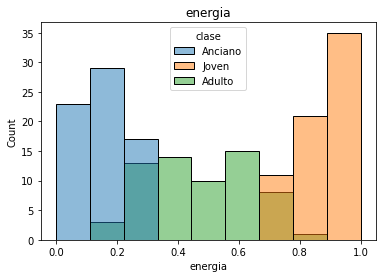

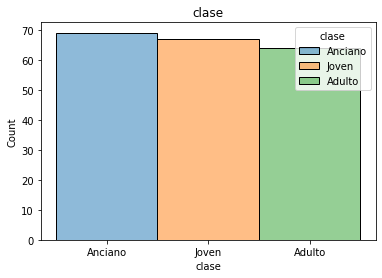

In [10]:
# M√°s ejemplos de gr√°ficas. Distribuciones respecto a la salida
for col in dataset.columns:
    plt.title(col)
    sns.histplot(data=dataset, x = col, hue='clase')
    plt.show()

# Se aprecia por ejemplo, que existen superposiciones en los rangos de las variables. Por lo tanto, no ser√≠a tan sencillo clasificar las clases de salida
# y obtener una precisi√≥n buena con simples secuencias de selecci√≥n (IF anidados por ejemplo, en d√≥nde se establece un umbral estricto).

In [11]:
# Tratamiento de los datos y divisi√≥n del dataset

# Definici√≥n de la columna de salida esperada (aprendizaje supervisado)
y = dataset.pop('clase')
print("Y antes:\n", y[:5])

# Preprocesamiento
# Se codifica num√©ricamente las categor√≠as definidas con etiquetas. Ej.: en lugar de ‚ÄúJoven‚Äù y ‚ÄúAdulto‚Äù en la clase, queda 0 y 1.
le = LabelEncoder()

y = le.fit_transform(y)     # Con le.inverse_transform() recuperamos luego la etiqueta original
print("Y despues: ", y[:5])

Y antes:
 0    Anciano
1      Joven
2      Joven
3     Adulto
4    Anciano
Name: clase, dtype: object
Y despues:  [1 2 2 0 1]


In [12]:
# Cantidad de datos a procesar.
print("Tama√±o actual - Salida:", y.shape)

Tama√±o actual - Salida: (200,)


In [13]:
X = np.asarray(dataset) # Esto se puede hacer directamente porque para y se us√≥ pop sobre el dataframe.
print("Tama√±o actual - Entrada:", X.shape) # Es importante que el tama√±o sea consistente entre X e Y (Entrada y Salida).

Tama√±o actual - Entrada: (200, 3)


In [14]:
# Ver datos de una determinada fila
index = 0
print("Tiempo: {} - Dinero: {} - Energ√≠a: {} || Clase: {}".format(X[index][0], X[index][1], X[index][2], le.inverse_transform(y)[index]))

Tiempo: 0.94 - Dinero: 0.44 - Energ√≠a: 0.17 || Clase: Anciano


## RNA - Topolog√≠a manual

In [15]:
# Divisi√≥n del dataset
# test_size: indica el porcentaje destinado a test/validacion
# random_state: un valor aleatorio cualquiera, sirve para garantizar repetibilidad. En este caso, en referencia a la subdivisi√≥n del set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [16]:
# Definici√≥n del tipo de modelo, capas, tama√±os, etc.

"""
M√°s tipos de capas y funciones de activaci√≥n en 'layers' de tensorflow
Ej.: from tensorflow.keras.layers import LeakyReLU, PReLU
softmax, softplus, softsign, tanh, selu, elu, exponential...
Cada una tiene sus propios argumentos. Ver ejemplos en: https://keras.io/api/layers/activations/
Para las capas, divertirse con: https://keras.io/api/layers/

Peque√±a gu√≠a con ejemplos: https://www.tutorialspoint.com/keras/keras_layers.htm
En esta √∫ltima, se presenta cuestiones como la inicializaci√≥n personalizada de los pesos,
establecer l√≠mites para los mismos, etc.
"""

# Vamos a trabajar con modelos secuenciales √∫nicamente
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(X.shape[1],))) # Es importante el tama√±o de la capa de entrada
model.add(layers.Dropout(0.2)) # Es una estrategia para hacer robusto al modelo. Se indica una probabilidad para el apagado aleatorio de las neuronas de la capa.

# --- INICIO CAPAS OCULTAS ---
# Ac√° entra en juego la creatividad, se pueden agregar tantas capas como se quiera
# La cantidad de neuronas por capa no generar√° ning√∫n inconveniente en el modelo
# Pueden probar diferentes configuraciones, funciones de activaci√≥n, etc.
# Charlamos respecto a qu√© pasa. Abajo vemos entrenamiento, desempe√±o...
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dropout(0.2))
# --- FIN CAPAS OCULTAS ---

model.add(layers.Dense(3, activation='softmax')) # Es importante el tama√±o de la capa de salida, es 3 porque vamos a usar 'sparse_categorical_crossentropy' para la p√©rdida. Y tenemos 3 categor√≠as o clases para la clasifici√≥n.

# Para visualizar la topolog√≠a resultante
model.summary()

# Notar que aparece un t√©rmino como "Non-trainable params". Esto se utiliza por ejemplo, para transferencia de aprendizaje.
# Podemos utilizar un red entrenada para algo parecido a nuestras necesidades, bloqueamos el entrenamiento en ciertas capas, y entrenamos solamente las capas nuevas.
# Es un adelanto simplemente :)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Se define el optimizador a utilizar, tasa de aprendizaje y otros argumentos a utilizar. Por ej: la m√©trica de referencia ser√° el accuracy
# Los par√°metros del compilador... quedan para otra ocasi√≥n.
model.compile(optimizer=optimizers.Adam(learning_rate=2e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Se entrena el modelo y se guardan los resultados. Se define un l√≠mite de √©pocas y el tama√±o de lotes a usar.
# El m√°ximo para el lote es la cantidad de datos disponibles, conviene utilizar uno tal que permita un n√∫mero significativo de mezclas a lo largo de las √©pocas.
history = model.fit(X, y, epochs=200, batch_size=20)

Epoch 1/200
10/10 [==============================] - 1s 4ms/step - loss: 1.2012 - accuracy: 0.2300
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 1.2030 - accuracy: 0.1200
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 1.1861 - accuracy: 0.0950
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 1.1923 - accuracy: 0.1300
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 1.1713 - accuracy: 0.1400
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 1.1833 - accuracy: 0.1000
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 1.1761 - accuracy: 0.1000
Epoch 8/200
10/10 [==============================] - 0s 3ms/step - loss: 1.1763 - accuracy: 0.1200
Epoch 9/200
10/10 [==============================] - 0s 3ms/step - loss: 1.1754 - accuracy: 0.1200
Epoch 10/200
10/10 [==============================] - 0s 4ms/step - loss: 1.1608 - accuracy: 0.1200
Epoch 11/

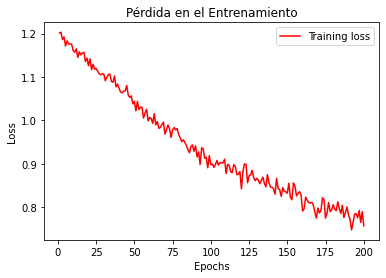

In [18]:
# Una gr√°fica simple de la evoluci√≥n de la p√©rdida durante las √©pocas que dur√≥ el entrenamiento
# De ac√° se puede extraer mucha informaci√≥n importante respecto a c√≥mo se desempe√±a la topolog√≠a establecida. Lo charlamos
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.title('P√©rdida en el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

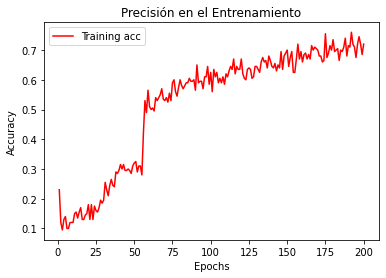

In [19]:
# √çdem, gr√°fica pero para la precisi√≥n de la RNA a lo largo del entrenamiento. Es de esperarse, que con cada √©poca... la precisi√≥n aumente
# Tambi√©n se obtiene mucha informaci√≥n respecto a, por ejemplo, si la RNA es capaz de generalizar los datos o simplemente se los memoriza.
# Si m√°s entrenamiento es conveniente o no, entre otros.
plt.clf()
acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.title('Precisi√≥n en el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
# Evaluaci√≥n del modelo sobre el set para test
# Esos son valores que no se usaron para entrenar. Si, por ejemplo, la red tiene un desempe√±o muy bueno durante el entrenamiento, pero con datos nuevos es mala...
# Significa que est√° sobre entrenada, se memoriz√≥ los valores. (overfitting)

result = model.evaluate(X_test, y_test) # Devuelve p√©rdida y accuracy
result

1/1 [==============================] - 0s 155ms/step - loss: 0.6037 - accuracy: 0.9000


[0.6036785244941711, 0.8999999761581421]

In [21]:
# Guardo las predicciones del modelos para analizarlas
y_pred = model.predict(X_test)
y_pred

# Las prediciones vienen en listas. Cada fila corresponde a una predicci√≥n.
# En cada lista, se tienen las probabilidades de pertenencia a cada clase
# Una forma r√°pida de determinar a qu√© clase pertenecen los datos de entrada,
# es seleccionando la clase con mayor probabilidad

array([[0.19013578, 0.77113426, 0.03872998],
       [0.3386379 , 0.25543025, 0.40593192],
       [0.3676184 , 0.28141457, 0.35096702],
       [0.34985885, 0.27262142, 0.37751976],
       [0.17699732, 0.789821  , 0.03318167],
       [0.19340892, 0.7671737 , 0.03941743],
       [0.3386379 , 0.25543025, 0.40593192],
       [0.16312441, 0.8124472 , 0.0244284 ],
       [0.22845958, 0.7208674 , 0.05067304],
       [0.18571313, 0.77697796, 0.03730894],
       [0.3386379 , 0.25543025, 0.40593192],
       [0.1433723 , 0.8394127 , 0.01721506],
       [0.39986402, 0.39182872, 0.20830731],
       [0.38494566, 0.34846038, 0.2665939 ],
       [0.17899303, 0.7897718 , 0.03123517],
       [0.34410927, 0.5005415 , 0.15534925],
       [0.23987387, 0.70511645, 0.0550097 ],
       [0.1510447 , 0.82895005, 0.02000518],
       [0.39248544, 0.35081878, 0.25669578],
       [0.38739693, 0.34511465, 0.26748845]], dtype=float32)

In [22]:
# Peque√±a funci√≥n para evaluar la respuesta y obtener la clase emergente
# En esta funci√≥n se busca la clase con mayor probabilidad
# Hay m√©todos hechos que hacen toda esta tarea, pero va a modo demostrativo
# Se puede operar todo seg√∫n las necesidades a resolver.

def predict_class(y_pred):
    y_class = []
    for i in y_pred:
        y_class.append(int(np.where(i == np.amax(i))[0]))
    
    return np.array(y_class)

In [23]:
y_pred_class = predict_class(y_pred)
# Ahora se puede comparar directamente y_pred con y_test

In [24]:
y_pred_class

array([1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [25]:
y_test

array([1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [26]:
# Si hay pocos datos, es f√°cil comparar visualmente
# Pero no es normal hacerlo as√≠. Se utilizan herramientas y/o m√©tricas
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.91      1.00      0.95        10
           2       0.75      1.00      0.86         3

    accuracy                           0.90        20
   macro avg       0.89      0.90      0.88        20
weighted avg       0.92      0.90      0.90        20



In [27]:
# Visualizaci√≥n de los resultados utilizando la matriz de confusi√≥n
# Lo ideal es que hayan valores √∫nicamente en la diagonal principal de la matriz
# Significa que... la RNA clasific√≥ correctamente cada observaci√≥n. Charlamos sobre esto un poco.
confusion_matrix(y_test,y_pred_class)

array([[ 5,  1,  1],
       [ 0, 10,  0],
       [ 0,  0,  3]])

## RNA - Topolog√≠a manual V2

In [52]:
# Espacio para hacer otro modelo, se puede copiar y pegar la base de arriba :)
# Ejemplo

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(X.shape[1],))) # Sigue siendo importante el tama√±o de la capa de entrada
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation='softmax')) # Sigue siendo importante el tama√±o de la capa de salida

# ¬øRNA m√°s grande significa mejor desempe√±o?

In [53]:
# Para visualizar la topolog√≠a resultante
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 4)                 16        
                                                                 
 dropout_40 (Dropout)        (None, 4)                 0         
                                                                 
 dense_46 (Dense)            (None, 4)                 20        
                                                                 
 dropout_41 (Dropout)        (None, 4)                 0         
                                                                 
 dense_47 (Dense)            (None, 8)                 40        
                                                                 
 dropout_42 (Dropout)        (None, 8)                 0         
                                                                 
 dense_48 (Dense)            (None, 16)               

In [58]:
# El compilador lo dejamos igual
model.compile(optimizer=optimizers.Adam(learning_rate=2e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Divisi√≥n del dataset (igual que el anterior, cambian proporciones)
# Ahora llamamos "validaci√≥n" a la otra parte de la subdivisi√≥n. Pero es lo mismo
# Esta vez vamos a usar en cada √©poca una porci√≥n de datos para verificar de otra manera el desempe√±o
# Despu√©s... hacemos test con datos que la red nunca vio (el otro csv)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [56]:
# Si se cambia test_size, la proporci√≥n cambia
# Estamos trabajando con pocas entradas
print("Tama√±o Entrenamiento: ", X_train.shape)
print("Tama√±o Validaci√≥n: ", X_val.shape)

Tama√±o Entrenamiento:  (140, 3)
Tama√±o Validaci√≥n:  (60, 3)


In [59]:
# Criterio de parada anticipada, si probaste una topolog√≠a grande... se podr√° intuir para qu√© sirve esto
# monitor: variable que "mira" para decidir si hay que terminar antes el entrenamiento
# min_delta: sensibilidad admitida / resoluci√≥n
# patience: cantidad de √©pocas que espera en b√∫squeda de alguna mejora
# restore_best_weights: si est√° en True, recupera los mejores pesos encontrados
# verbose: para mostrar diferentes niveles de mensajes. En 0 no avisa nada, en 1 avisa que se par√≥ por los criterios establecidos, etc
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=20, restore_best_weights=True, verbose = 1)

# Para el entrenamiento, usamos otros datos para la validaci√≥n del modelo
# En el historial se guardan la informaci√≥n para el proceso con datos de validaci√≥n
history = model.fit(X_train, y_train, epochs=800, batch_size=10, validation_data=(X_val, y_val), callbacks=early_stopping)

Epoch 1/800
14/14 [==============================] - 1s 20ms/step - loss: 1.0997 - accuracy: 0.3500 - val_loss: 1.0985 - val_accuracy: 0.2333
Epoch 2/800
14/14 [==============================] - 0s 6ms/step - loss: 1.1019 - accuracy: 0.3429 - val_loss: 1.0988 - val_accuracy: 0.2333
Epoch 3/800
14/14 [==============================] - 0s 5ms/step - loss: 1.0978 - accuracy: 0.4000 - val_loss: 1.0988 - val_accuracy: 0.2333
Epoch 4/800
14/14 [==============================] - 0s 4ms/step - loss: 1.0984 - accuracy: 0.3786 - val_loss: 1.0991 - val_accuracy: 0.2333
Epoch 5/800
14/14 [==============================] - 0s 6ms/step - loss: 1.0975 - accuracy: 0.3929 - val_loss: 1.0991 - val_accuracy: 0.2333
Epoch 6/800
14/14 [==============================] - 0s 5ms/step - loss: 1.0966 - accuracy: 0.3857 - val_loss: 1.0990 - val_accuracy: 0.2333
Epoch 7/800
14/14 [==============================] - 0s 5ms/step - loss: 1.0960 - accuracy: 0.4143 - val_loss: 1.0992 - val_accuracy: 0.2333
Epoch 8/800


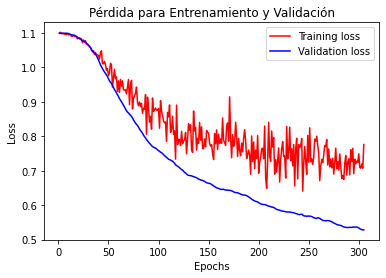

In [60]:
# Notar que el entrenamiento anterior finaliza antes de las √©pocas totales establecidas para el fit, justamente por el nuevo criterio de parada
# Entrena hasta que se cumpla alg√∫n criterio
# En este caso, se entren√≥ hasta una determinada p√©rdida en el set de validaci√≥n. Es de esperarse, que sobre un set de test se obtenga un resultado muy parecido.

# Ahora se disponen de los datos para el set de validaci√≥n
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('P√©rdida para Entrenamiento y Validaci√≥n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

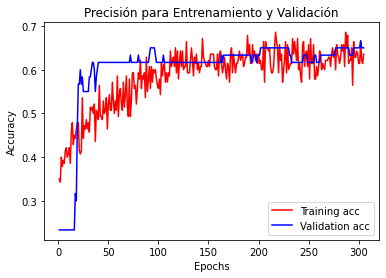

In [61]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Precisi√≥n para Entrenamiento y Validaci√≥n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# De estas curvas se pueden obtener varias conclusiones respecto a la red.
# En principio, deben ser bastante parecidas tanto train como val, reflejando el aprendizaje de la RNA
# El desempe√±o sobre val suele ser menor, son datos no utilizados para el entrenamiento (de forma directa)
# Si en val se obtienen cosas muy diferentes (respecto a train), al realizar predicciones sobre el set para test va a pasar algo muy parecido (a lo que pas√≥ con val)
# Muy resumido todo, cada cuesti√≥n tiene de fondo un an√°lisis extensivo.

## Prueba sobre datos que la RNA nunca vio

In [62]:
# Abrimos el otro csv
dataset_test = pd.read_csv("data_test.csv")

# Hay que procesar de la misma forma que los datos usados para entrenar
y_test = dataset_test.pop('clase')
y_test = le.fit_transform(y_test)
X_test = np.asarray(dataset_test)

In [63]:
# Se hacen las predicciones y se compara con los valores reales
y_pred = model.predict(X_test)
y_pred_class = predict_class(y_pred)
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.97      1.00      0.98        32
           2       0.59      1.00      0.74        39

    accuracy                           0.72       100
   macro avg       0.85      0.68      0.60       100
weighted avg       0.83      0.72      0.62       100



In [64]:
confusion_matrix(y_test,y_pred_class)

array([[ 1,  1, 27],
       [ 0, 32,  0],
       [ 0,  0, 39]])

Si es confuso/complejo ver las clases con n√∫meros, siempre puedo volver a las etiquetas originales

In [65]:
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred_class)))

              precision    recall  f1-score   support

      Adulto       1.00      0.03      0.07        29
     Anciano       0.97      1.00      0.98        32
       Joven       0.59      1.00      0.74        39

    accuracy                           0.72       100
   macro avg       0.85      0.68      0.60       100
weighted avg       0.83      0.72      0.62       100



In [66]:
# Arreglo codificado
y_pred_class

array([1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [67]:
# Arreglo DEcodificado
le.inverse_transform(y_pred_class)

array(['Anciano', 'Joven', 'Joven', 'Anciano', 'Joven', 'Joven', 'Joven',
       'Joven', 'Anciano', 'Joven', 'Anciano', 'Anciano', 'Anciano',
       'Joven', 'Joven', 'Joven', 'Joven', 'Joven', 'Joven', 'Joven',
       'Joven', 'Joven', 'Joven', 'Joven', 'Joven', 'Anciano', 'Anciano',
       'Joven', 'Joven', 'Joven', 'Joven', 'Anciano', 'Anciano',
       'Anciano', 'Anciano', 'Joven', 'Joven', 'Anciano', 'Joven',
       'Joven', 'Joven', 'Joven', 'Joven', 'Joven', 'Anciano', 'Anciano',
       'Joven', 'Anciano', 'Joven', 'Joven', 'Joven', 'Joven', 'Joven',
       'Joven', 'Joven', 'Joven', 'Anciano', 'Anciano', 'Joven', 'Joven',
       'Anciano', 'Joven', 'Joven', 'Anciano', 'Joven', 'Anciano',
       'Joven', 'Joven', 'Joven', 'Joven', 'Joven', 'Joven', 'Anciano',
       'Joven', 'Adulto', 'Joven', 'Anciano', 'Anciano', 'Joven',
       'Anciano', 'Anciano', 'Joven', 'Anciano', 'Joven', 'Joven',
       'Anciano', 'Joven', 'Anciano', 'Joven', 'Anciano', 'Joven',
       'Anciano', 'Anc